In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
df2016 = pd.read_csv('2016_data_integrated.csv')
df2016['Datetime'] = pd.to_datetime(df2016['Datetime'])
df2016.set_index('Datetime', inplace=True)

df2017 = pd.read_csv('2017_data_integrated.csv')
df2017['Datetime'] = pd.to_datetime(df2017['Datetime'])
df2017.set_index('Datetime', inplace=True)

df2018 = pd.read_csv('2018_data_integrated.csv')
df2018['Datetime'] = pd.to_datetime(df2018['Datetime'])
df2018.set_index('Datetime', inplace=True)

df2019 = pd.read_csv('2019_data_integrated.csv')
df2019['Datetime'] = pd.to_datetime(df2019['Datetime'])
df2019.set_index('Datetime', inplace=True)

df2020 = pd.read_csv('2020_data_integrated.csv')
df2020['Datetime'] = pd.to_datetime(df2020['Datetime'])
df2020.set_index('Datetime', inplace=True)

df2021 = pd.read_csv('2021_data_integrated.csv')
df2021['Datetime'] = pd.to_datetime(df2021['Datetime'])
df2021.set_index('Datetime', inplace=True)

df2022 = pd.read_csv('2022_data_integrated.csv')
df2022['Datetime'] = pd.to_datetime(df2022['Datetime'])
df2022.set_index('Datetime', inplace=True)

In [3]:
df_combined = pd.concat([df2016, df2017, df2018, df2019, df2020, df2021, df2022])

columns_to_drop = ['Bonn2016', 'Bonn2017', 'Bonn2018', 'Bonn2019', 'Bonn2020', 'Bonn2021', 'Bonn2022']

df_combined = df_combined.drop(columns=columns_to_drop)


df_combined

Temperature (°C)  Precipitations (mm)  Wind Speed (m/s)  \
Datetime                                                                       
2016-01-01 00:00:00               4.7                  0.0               2.7   
2016-01-01 01:00:00               4.3                  0.2               3.7   
2016-01-01 02:00:00               4.7                  0.3               3.2   
2016-01-01 03:00:00               4.6                  0.0               3.3   
2016-01-01 04:00:00               5.0                  0.0               4.9   
...                               ...                  ...               ...   
2022-12-31 19:00:00              15.2                  0.0               6.6   
2022-12-31 20:00:00              15.2                  0.0               6.9   
2022-12-31 21:00:00              14.9                  0.0               6.6   
2022-12-31 22:00:00              15.2                  0.0               5.5   
2022-12-31 23:00:00              15.5                  0.0               7.7   

                     KennedyBrücke  NordBrücke  SüdBrücke  Estermannufer  \
Datetime                                                                   
2016-01-01 00:00:00           48.0         2.0       27.0            0.0   
2016-01-01 01:00:00           78.0        15.0       14.0            2.0   
2016-01-01 02:00:00           91.0         6.0       27.0            0.0   
2016-01-01 03:00:00          103.0         3.0        9.0            4.0   
2016-01-01 04:00:00           50.0         9.0       14.0            0.0   
...                            ...         ...        ...            ...   
2022-12-31 19:00:00          212.0        16.0        8.0            1.0   
2022-12-31 20:00:00          125.0         8.0        9.0            0.0   
2022-12-31 21:00:00           69.0         8.0        9.0            2.0   
2022-12-31 22:00:00           71.0         4.0       11.0            0.0   
2022-12-31 23:00:00           50.0         1.0       10.0            2.0   

                     VonSandtUfer  Rhenusallee  BrühlerStraße  \
Datetime                                                        
2016-01-01 00:00:00           0.0          2.0            1.0   
2016-01-01 01:00:00          13.0         11.0            1.0   
2016-01-01 02:00:00           0.0         14.0           11.0   
2016-01-01 03:00:00           1.0          4.0            8.0   
2016-01-01 04:00:00           0.0          2.0            2.0   
...                           ...          ...            ...   
2022-12-31 19:00:00           8.0          0.0           11.0   
2022-12-31 20:00:00          13.0          0.0            7.0   
2022-12-31 21:00:00           1.0          0.0           11.0   
2022-12-31 22:00:00           6.0          0.0            2.0   
2022-12-31 23:00:00           7.0          0.0            3.0   

                     WilhelmSpiritusUfer  McCloyWeg  WegDammBonnBeuel  
Datetime                                                               
2016-01-01 00:00:00                  0.0        0.0               0.0  
2016-01-01 01:00:00                  0.0        0.0               0.0  
2016-01-01 02:00:00                  0.0        0.0               0.0  
2016-01-01 03:00:00                  0.0        0.0               0.0  
2016-01-01 04:00:00                  0.0        0.0               0.0  
...                                  ...        ...               ...  
2022-12-31 19:00:00                 12.0        5.0              28.0  
2022-12-31 20:00:00                 13.0        4.0              19.0  
2022-12-31 21:00:00                 19.0        1.0              11.0  
2022-12-31 22:00:00                 21.0        1.0              15.0  
2022-12-31 23:00:00                 13.0        6.0              13.0  

[61368 rows x 13 columns]

In [4]:
columns_to_sum = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']

df_combined['Bonn'] = df_combined[columns_to_sum].sum(axis=1)
df_combined

Temperature (°C)  Precipitations (mm)  Wind Speed (m/s)  \
Datetime                                                                       
2016-01-01 00:00:00               4.7                  0.0               2.7   
2016-01-01 01:00:00               4.3                  0.2               3.7   
2016-01-01 02:00:00               4.7                  0.3               3.2   
2016-01-01 03:00:00               4.6                  0.0               3.3   
2016-01-01 04:00:00               5.0                  0.0               4.9   
...                               ...                  ...               ...   
2022-12-31 19:00:00              15.2                  0.0               6.6   
2022-12-31 20:00:00              15.2                  0.0               6.9   
2022-12-31 21:00:00              14.9                  0.0               6.6   
2022-12-31 22:00:00              15.2                  0.0               5.5   
2022-12-31 23:00:00              15.5                  0.0               7.7   

                     KennedyBrücke  NordBrücke  SüdBrücke  Estermannufer  \
Datetime                                                                   
2016-01-01 00:00:00           48.0         2.0       27.0            0.0   
2016-01-01 01:00:00           78.0        15.0       14.0            2.0   
2016-01-01 02:00:00           91.0         6.0       27.0            0.0   
2016-01-01 03:00:00          103.0         3.0        9.0            4.0   
2016-01-01 04:00:00           50.0         9.0       14.0            0.0   
...                            ...         ...        ...            ...   
2022-12-31 19:00:00          212.0        16.0        8.0            1.0   
2022-12-31 20:00:00          125.0         8.0        9.0            0.0   
2022-12-31 21:00:00           69.0         8.0        9.0            2.0   
2022-12-31 22:00:00           71.0         4.0       11.0            0.0   
2022-12-31 23:00:00           50.0         1.0       10.0            2.0   

                     VonSandtUfer  Rhenusallee  BrühlerStraße  \
Datetime                                                        
2016-01-01 00:00:00           0.0          2.0            1.0   
2016-01-01 01:00:00          13.0         11.0            1.0   
2016-01-01 02:00:00           0.0         14.0           11.0   
2016-01-01 03:00:00           1.0          4.0            8.0   
2016-01-01 04:00:00           0.0          2.0            2.0   
...                           ...          ...            ...   
2022-12-31 19:00:00           8.0          0.0           11.0   
2022-12-31 20:00:00          13.0          0.0            7.0   
2022-12-31 21:00:00           1.0          0.0           11.0   
2022-12-31 22:00:00           6.0          0.0            2.0   
2022-12-31 23:00:00           7.0          0.0            3.0   

                     WilhelmSpiritusUfer  McCloyWeg  WegDammBonnBeuel   Bonn  
Datetime                                                                      
2016-01-01 00:00:00                  0.0        0.0               0.0   80.0  
2016-01-01 01:00:00                  0.0        0.0               0.0  134.0  
2016-01-01 02:00:00                  0.0        0.0               0.0  149.0  
2016-01-01 03:00:00                  0.0        0.0               0.0  132.0  
2016-01-01 04:00:00                  0.0        0.0               0.0   77.0  
...                                  ...        ...               ...    ...  
2022-12-31 19:00:00                 12.0        5.0              28.0  301.0  
2022-12-31 20:00:00                 13.0        4.0              19.0  198.0  
2022-12-31 21:00:00                 19.0        1.0              11.0  131.0  
2022-12-31 22:00:00                 21.0        1.0              15.0  131.0  
2022-12-31 23:00:00                 13.0        6.0              13.0  105.0  

[61368 rows x 14 columns]

### Monoticity check: 

In [6]:
initial_frequency = df_combined.index.inferred_freq

if not initial_frequency:
    df_combined = df_combined.asfreq('H') 
    
is_monotonic = df_combined.index.is_monotonic

initial_frequency, is_monotonic


('H', True)

In [7]:
train_end = pd.to_datetime('2021-12-31 23:00:00')
test_start = pd.to_datetime('2022-01-01 00:00:00')

train_data = df_combined.loc[df_combined.index <= train_end]
test_data = df_combined.loc[df_combined.index >= test_start]

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


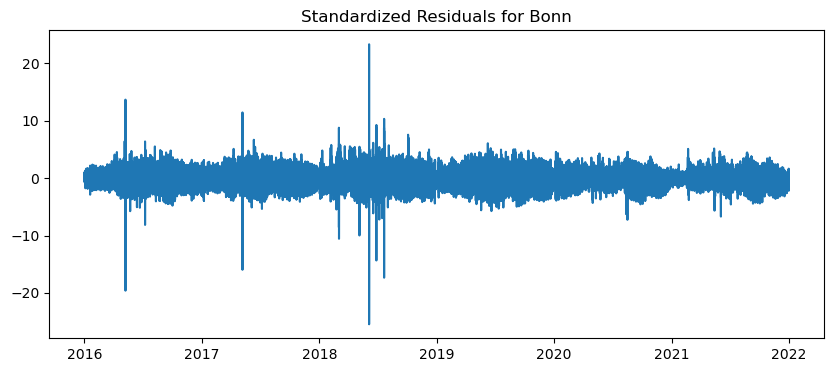

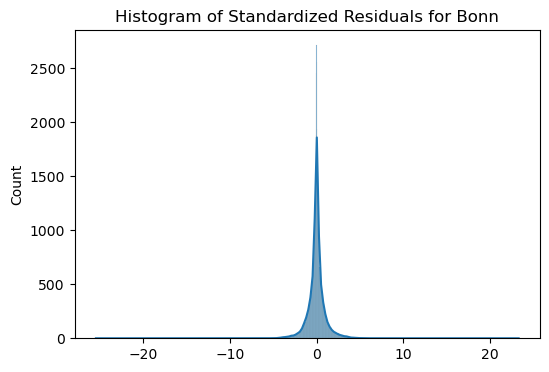

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX


location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']


exog_variables = ['Temperature (°C)','Precipitations (mm)','Wind Speed (m/s)','Holiday']

results_dict = {}

locations_to_process = ['Bonn']

for specific_location in locations_to_process:
    # transformed_column, lam = boxcox(train_data[specific_location] + 1)  
    
    original_data = train_data[specific_location]

    model = sm.tsa.SARIMAX(original_data, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=train_data[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        # 'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals,
        # 'lambda': lam 
    }


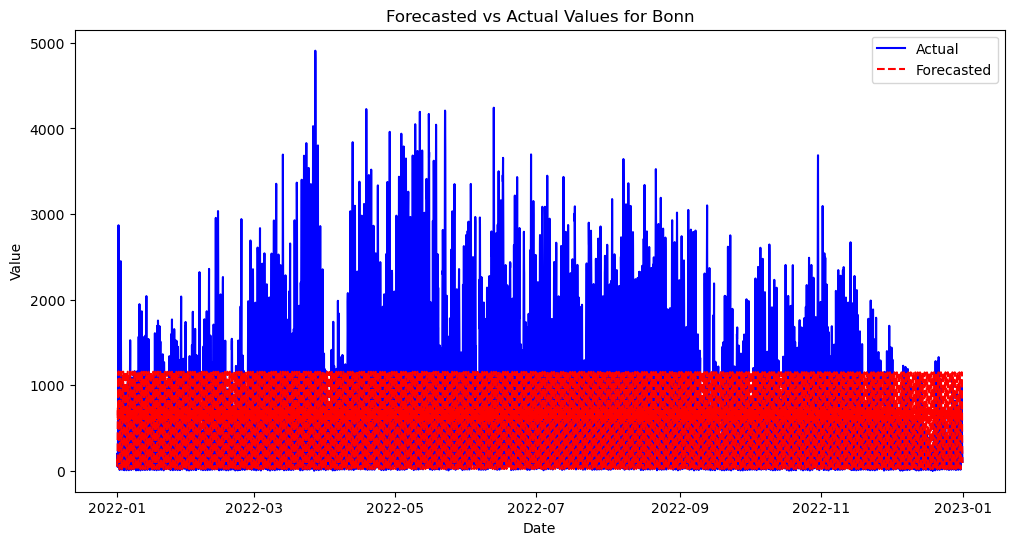

The Root Mean Squared Error of our forecasts is 727.1086997875369


In [19]:
specific_location = 'Bonn'
model_results = results_dict[specific_location]['model_results']


forecasted_values = model_results.get_forecast(steps=len(test_data), exog=test_data[exog_variables])

forecasted_values_series = forecasted_values.predicted_mean


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data[specific_location], label='Actual', color='blue')
plt.plot(test_data.index, forecasted_values_series, label='Forecasted', color='red', linestyle='--')
plt.title(f'Forecasted vs Actual Values for {specific_location}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_data[specific_location], forecasted_values_series))
print(f'The Root Mean Squared Error of our forecasts is {rmse}')

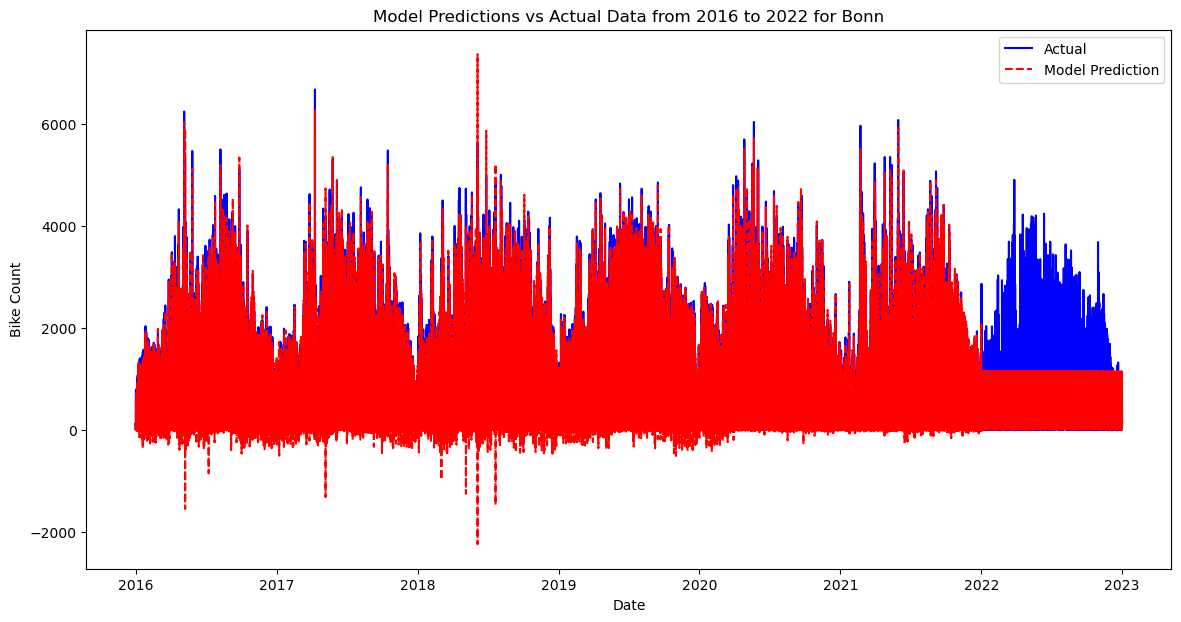

In [20]:

in_sample_preds = model_results.get_prediction(start=train_data.index[0], end=train_data.index[-1], dynamic=False)
in_sample_preds_series = in_sample_preds.predicted_mean

out_of_sample_forecast = model_results.get_forecast(steps=len(test_data), exog=test_data[exog_variables])
out_of_sample_forecast_series = out_of_sample_forecast.predicted_mean

full_prediction_series = pd.concat([in_sample_preds_series, out_of_sample_forecast_series])

full_actual_series = pd.concat([train_data['Bonn'], test_data['Bonn']])

plt.figure(figsize=(14, 7))
plt.plot(full_actual_series.index, full_actual_series, label='Actual', color='blue')
plt.plot(full_prediction_series.index, full_prediction_series, label='Model Prediction', color='red', linestyle='--')
plt.title('Model Predictions vs Actual Data from 2016 to 2022 for Bonn')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.show()

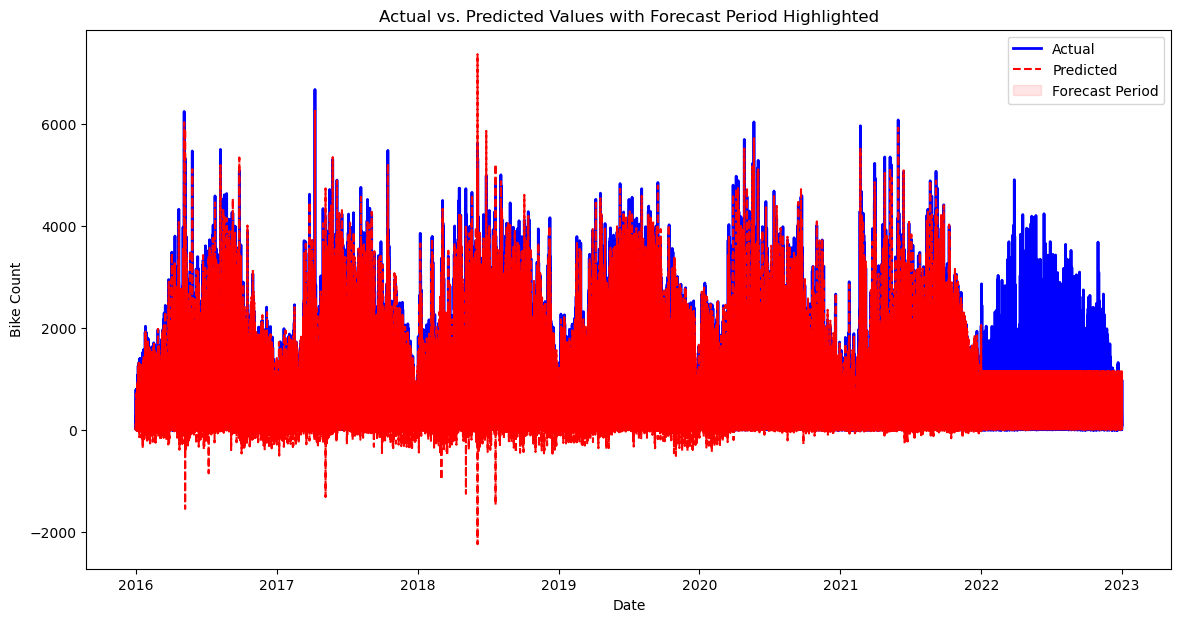

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(full_actual_series.index, full_actual_series, label='Actual', color='blue', linewidth=2)
plt.plot(full_prediction_series.index, full_prediction_series, label='Predicted', color='red', linestyle='--')
plt.fill_between(test_data.index, full_prediction_series[-len(test_data):].min(), full_prediction_series[-len(test_data):].max(), color='red', alpha=0.1, label='Forecast Period')
plt.title('Actual vs. Predicted Values with Forecast Period Highlighted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.show()


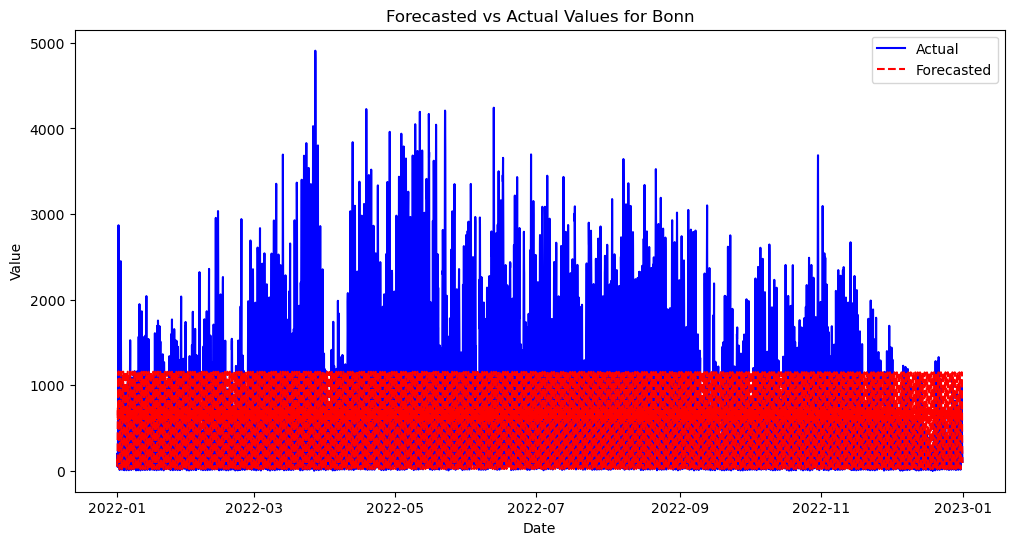

The Root Mean Squared Error of our forecasts is 727.1086997875369


In [22]:
specific_location = 'Bonn'
model_results = results_dict[specific_location]['model_results']


forecasted_values = model_results.get_forecast(steps=len(test_data), exog=test_data[exog_variables])

forecasted_values_series = forecasted_values.predicted_mean


plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data[specific_location], label='Actual', color='blue')
plt.plot(test_data.index, forecasted_values_series, label='Forecasted', color='red', linestyle='--')
plt.title(f'Forecasted vs Actual Values for {specific_location}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# error metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_data[specific_location], forecasted_values_series))
print(f'The Root Mean Squared Error of our forecasts is {rmse}')

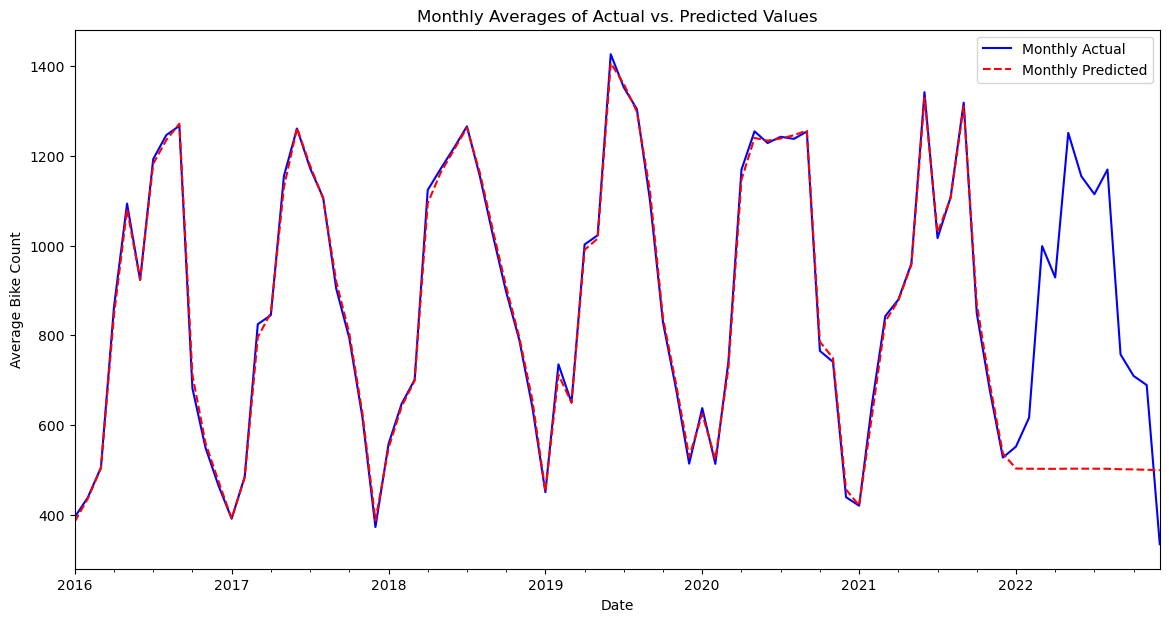

In [23]:
monthly_actual = full_actual_series.resample('M').mean()
monthly_predicted = full_prediction_series.resample('M').mean()

plt.figure(figsize=(14, 7))
monthly_actual.plot(label='Monthly Actual', color='blue')
monthly_predicted.plot(label='Monthly Predicted', color='red', linestyle='--')
plt.title('Monthly Averages of Actual vs. Predicted Values')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Bike Count')
plt.show()


## Try 3: 

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX


location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']
exog_variables = ['Temperature (°C)']

results_dict = {}

locations_to_process = ['Bonn']

for specific_location in locations_to_process:
    # transformed_column, lam = boxcox(train_data[specific_location] + 1)  
    
    original_data = train_data[specific_location]

    model = sm.tsa.SARIMAX(original_data, order=(2, 0, 2), seasonal_order=(2, 0, 2, 24), exog=train_data[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        # 'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals,
        # 'lambda': lam 
    }


LinAlgError: LU decomposition error.

### Try 2: 

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


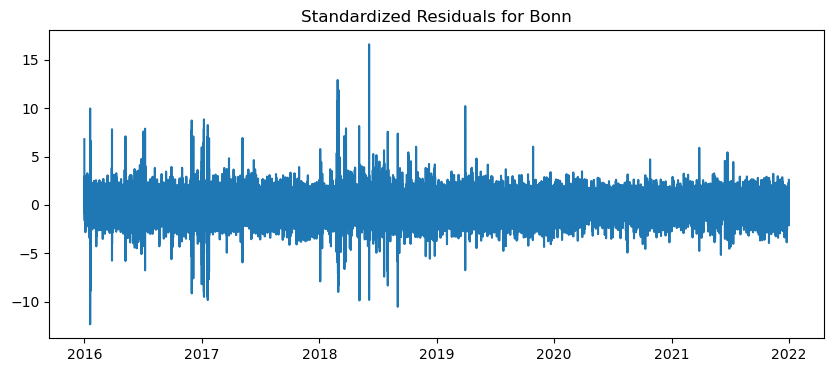

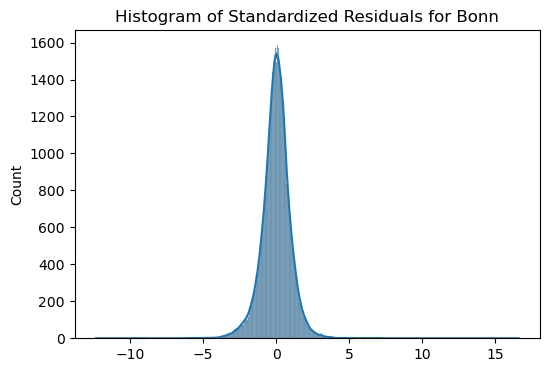

In [10]:
locations_to_process = ['Bonn']

for specific_location in locations_to_process:
    transformed_column, lam = boxcox(train_data[specific_location] + 1)  # Store lam
    
    original_data = train_data[specific_location]

    model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=train_data[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals,
        'lambda': lam  
    }

In [11]:
specific_location = 'Bonn'
model_results = results_dict[specific_location]['model_results']
lam = results_dict[specific_location]['lambda']

forecasted_transformed_values = model_results.forecast(steps=len(test_data), exog=test_data[exog_variables])

In [12]:
def inverse_boxcox(y, lam):
    if lam == 0:
        return np.exp(y) - 1
    else:
        return np.power(lam * y + 1, 1 / lam) - 1

forecasted_original_values = inverse_boxcox(forecasted_transformed_values, lam)

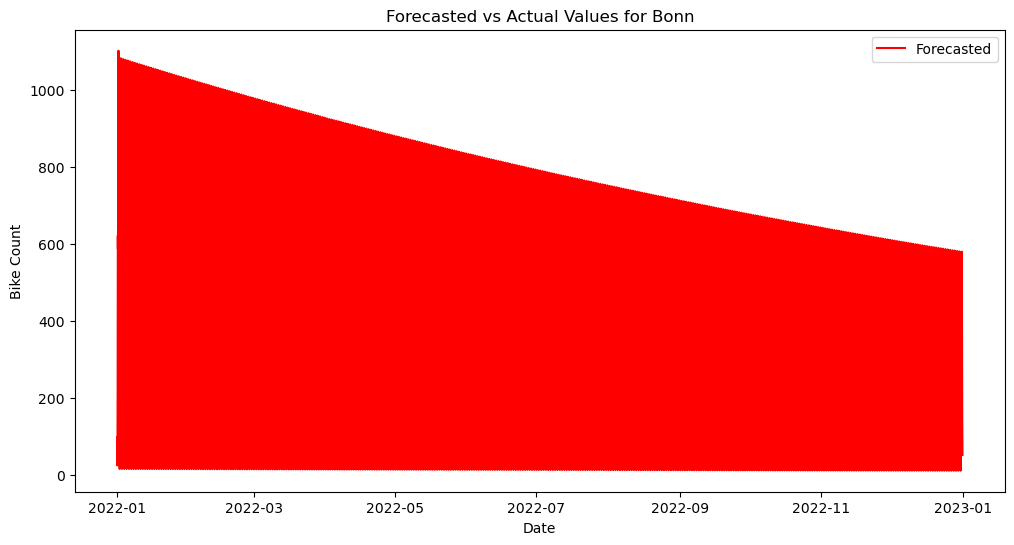

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, forecasted_original_values, label='Forecasted', color='red')

plt.title(f'Forecasted vs Actual Values for {specific_location}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.show()

# Initial building of SARIMAX:

#### Why SARIMAX and not ARIMA or ARIMAX? 
S stands for Seasonality and the added X for external variables. 

In our case we have 3 external variables so using ARIMA won't be possible since it is suitable for univariate time series data without seasonal componant.

Additionaly we can't ignore the seasonality here because we have a higher number of bikes in summer rather than any other seson. 

In [27]:
# External variables
exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']


locations = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']

predictions = {}

# Looping for each location seperately
for location in locations:

    
    target = df_combined[location]
    exog = df_combined[exog_variables]

    train = target[:'2021-12-31']
    test = target['2022-01-01':]
    exog_train = exog[:'2021-12-31']
    exog_test = exog['2022-01-01':]

    model = SARIMAX(train, order=(1, 0, 1), exog=exog_train)
    results = model.fit()

    forecast = results.get_forecast(steps=len(test), exog=exog_test)
    predictions[location] = forecast.predicted_mean

    
predictions['KennedyBrücke'].head()

2022-01-01 00:00:00    54.077862
2022-01-01 01:00:00    49.090735
2022-01-01 02:00:00    44.645560
2022-01-01 03:00:00    40.512681
2022-01-01 04:00:00    36.840797
Freq: H, Name: predicted_mean, dtype: float64

In [16]:
predictions_df = pd.concat(predictions, axis=1)
predictions_df.index.name = 'Datetime'
predictions_df

KennedyBrücke  NordBrücke  SüdBrücke  Estermannufer  \
Datetime                                                                   
2022-01-01 00:00:00      54.077862    2.241836  11.668797       0.110066   
2022-01-01 01:00:00      49.090735    2.056996   9.573162       0.112301   
2022-01-01 02:00:00      44.645560    1.909635   7.901524       0.140597   
2022-01-01 03:00:00      40.512681    1.753810   6.469728       0.148448   
2022-01-01 04:00:00      36.840797    1.624456   5.379080       0.158628   
...                            ...         ...        ...            ...   
2022-12-31 19:00:00       1.727512    0.424722   0.954364       0.460412   
2022-12-31 20:00:00       1.746680    0.427939   0.972896       0.461858   
2022-12-31 21:00:00       1.701739    0.417736   0.943575       0.451953   
2022-12-31 22:00:00       1.657232    0.412928   0.886414       0.455109   
2022-12-31 23:00:00       1.823566    0.443503   1.033104       0.474174   

                     VonSandtUfer  Rhenusallee  BrühlerStraße  \
Datetime                                                        
2022-01-01 00:00:00     15.290421    16.088669       6.413193   
2022-01-01 01:00:00     14.001947    14.666492       5.819061   
2022-01-01 02:00:00     12.847138    13.414776       5.301530   
2022-01-01 03:00:00     11.737770    12.237738       4.820187   
2022-01-01 04:00:00     10.773079    11.182502       4.385884   
...                           ...          ...            ...   
2022-12-31 19:00:00      0.692916     0.814305       0.350985   
2022-12-31 20:00:00      0.705375     0.819236       0.351701   
2022-12-31 21:00:00      0.684650     0.800374       0.344369   
2022-12-31 22:00:00      0.647235     0.796225       0.348363   
2022-12-31 23:00:00      0.746864     0.846315       0.360225   

                     WilhelmSpiritusUfer  McCloyWeg  WegDammBonnBeuel  
Datetime                                                               
2022-01-01 00:00:00            14.338202   2.158898         10.608724  
2022-01-01 01:00:00            12.514983   2.027613          9.731892  
2022-01-01 02:00:00            10.973235   1.931216          8.966645  
2022-01-01 03:00:00             9.559401   1.815101          8.234519  
2022-01-01 04:00:00             8.398088   1.717478          7.578376  
...                                  ...        ...               ...  
2022-12-31 19:00:00             1.092292   0.517652          0.701917  
2022-12-31 20:00:00             1.109080   0.521325          0.705649  
2022-12-31 21:00:00             1.078023   0.509030          0.689684  
2022-12-31 22:00:00             1.030736   0.504184          0.688232  
2022-12-31 23:00:00             1.168117   0.539742          0.727835  

[8760 rows x 10 columns]

In [25]:
print(predictions_df.to_string())

                     KennedyBrücke  NordBrücke  SüdBrücke  Estermannufer  VonSandtUfer  Rhenusallee  BrühlerStraße  WilhelmSpiritusUfer  McCloyWeg  WegDammBonnBeuel
Datetime                                                                                                                                                            
2022-01-01 00:00:00      54.077862    2.241836  11.668797       0.110066     15.290421    16.088669       6.413193            14.338202   2.158898         10.608724
2022-01-01 01:00:00      49.090735    2.056996   9.573162       0.112301     14.001947    14.666492       5.819061            12.514983   2.027613          9.731892
2022-01-01 02:00:00      44.645560    1.909635   7.901524       0.140597     12.847138    13.414776       5.301530            10.973235   1.931216          8.966645
2022-01-01 03:00:00      40.512681    1.753810   6.469728       0.148448     11.737770    12.237738       4.820187             9.559401   1.815101          8.234519
2022-01-01

## Evaluation of initial performance: 

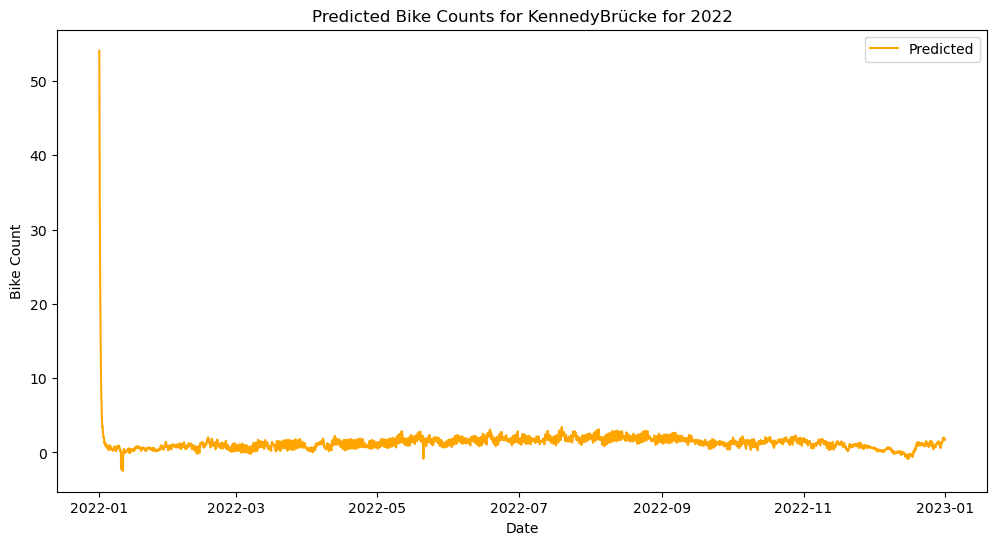

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(predictions_df['KennedyBrücke'].index, predictions_df['KennedyBrücke'], color='orange', label='Predicted')
plt.title('Predicted Bike Counts for KennedyBrücke for 2022')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.legend()
plt.show()



--> Really really bad

### Error matrics: 

In [27]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

error_metrics = {}

for location in predictions_df.columns:
    if location in df2022.columns:
        actual_values = df2022[location]
        predicted_values = predictions_df[location]

        mae = mean_absolute_error(actual_values, predicted_values)
        mse = mean_squared_error(actual_values, predicted_values)
        rmse = np.sqrt(mse)

        error_metrics[location] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

        
    
for location, metrics in error_metrics.items():
    print(f"{location}: MAE = {metrics['MAE']}, MSE = {metrics['MSE']}, RMSE = {metrics['RMSE']}")

KennedyBrücke: MAE = 277.11252802496085, MSE = 136912.67574024916, RMSE = 370.01712898222587
NordBrücke: MAE = 57.00201634134138, MSE = 7010.565122171486, RMSE = 83.72911752891874
SüdBrücke: MAE = 96.49469732205927, MSE = 22441.90231715258, RMSE = 149.80621588289512
Estermannufer: MAE = 30.021486176942346, MSE = 2680.3293126852564, RMSE = 51.771896939220376
VonSandtUfer: MAE = 74.30371724225029, MSE = 14062.09686917557, RMSE = 118.58371249533205
Rhenusallee: MAE = 27.99259352598056, MSE = 5071.769011767652, RMSE = 71.21635354163854
BrühlerStraße: MAE = 39.581594164015705, MSE = 2840.683202408742, RMSE = 53.29806002481462
WilhelmSpiritusUfer: MAE = 110.41209776543249, MSE = 27384.931671052826, RMSE = 165.48393176092
McCloyWeg: MAE = 53.09826755040185, MSE = 7837.821418085027, RMSE = 88.53147134259673
WegDammBonnBeuel: MAE = 87.83042598917748, MSE = 17908.403237444996, RMSE = 133.82228229052512


### Re-evaluating the Model order: 

we are using Autocorrelation and Partial Autocorrelation Plots. 

    - The PACF plot helps determine the order of the AR part (p).
    - The ACF plot helps determine the order of the MA part (q). 

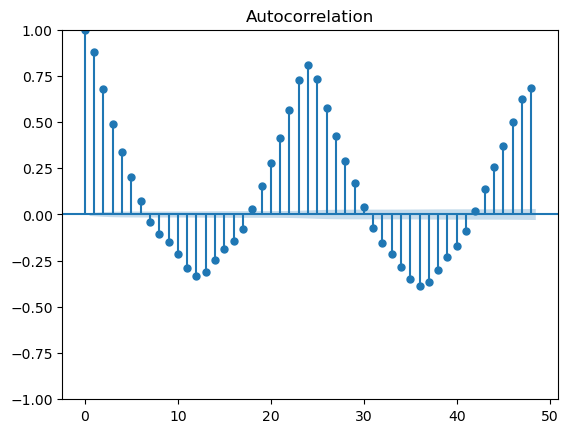

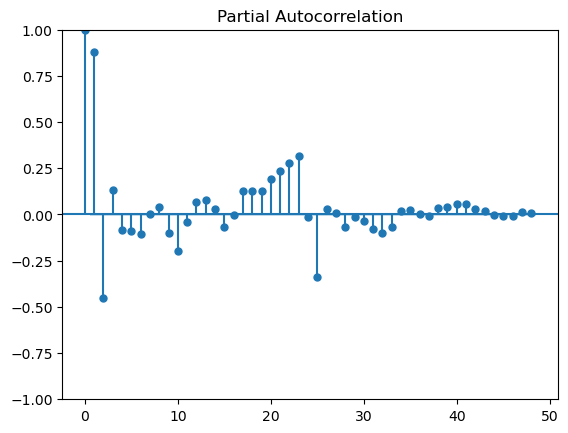

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Example for one location
plot_acf(df_combined['KennedyBrücke'].dropna())
plot_pacf(df_combined['KennedyBrücke'].dropna(), method='ywm')
plt.show()


Result: 

    - PACF Plot: AR(1) Model because the first lag is significant 
    - ACF Plot: 
    
                --> MA(1) could be appropriate since the plot declines radually 
                --> it suggests again that there is seasonality 
  
    

## Initial fitting: 

                                     SARIMAX Results                                      
Dep. Variable:                   WegDammBonnBeuel   No. Observations:                52608
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood             -256672.498
Date:                            Mon, 08 Jan 2024   AIC                         513360.996
Time:                                    22:00:27   BIC                         513431.961
Sample:                                01-01-2016   HQIC                        513383.173
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Temperature (°C)        0.0107      0.011      0.981      0.327      -0.011       0.032
Precipit

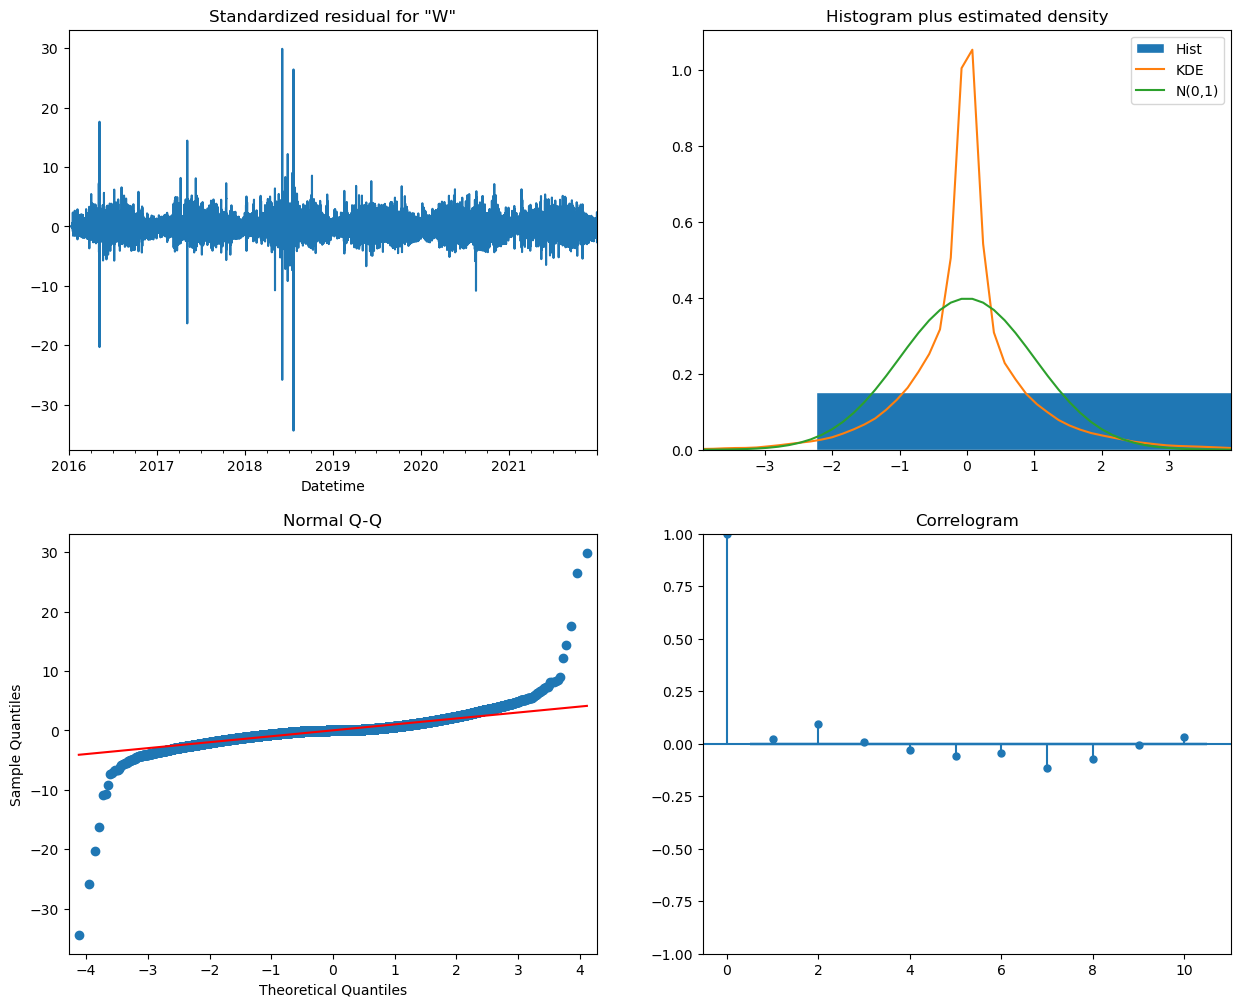

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 1  # AR order
d = 0  # Differencing order, 0 since data is stationary
q = 1  # MA order

P = 1  # Seasonal AR order
D = 0  # Seasonal differencing, 0 since data is stationary
Q = 1  # Seasonal MA order
S = 24 # Seasonal period, taking 24 here as daily


model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S), exog=exog_train)
results = model.fit()

print(results.summary())

# Diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()


# Fixing issues (wild try): 

### 1. Residuals (difference between the observed values and predicted ones):

--> I have to see no pattern --> The graph should be similar to a white noise graph. why? this shows that there is no autocorrelation --> THERE IS NO PATTERN IN MY MISTAKES 

--> residuals should be normally distributed. why? 

What should i do? --> Data transformation --> I am using boxcox here which transforms non-normal data into a normal distribution --> We are trying to stabilize variance here.

#### Concerns: 
#### Over-differention
--> this can introduce unnecessary complexity and might lead to over fitting

--> This can lead to a loss of valuable information --> potentioally degrading the mpdel's performance. 

### Trying for the location WegDammBonnBeuel:

In [26]:
from scipy.stats import boxcox
import seaborn as sns


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


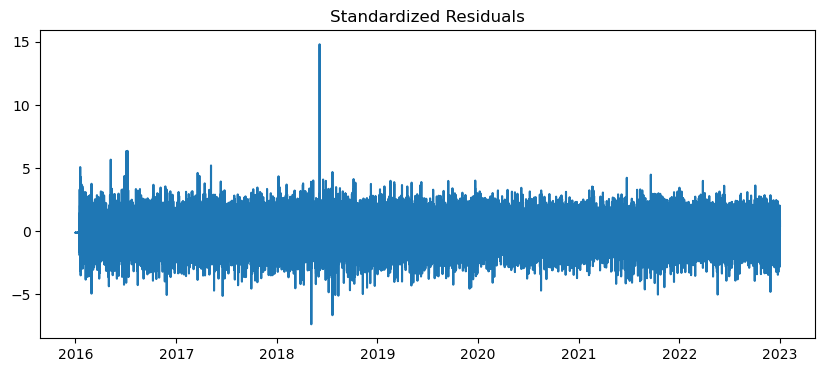

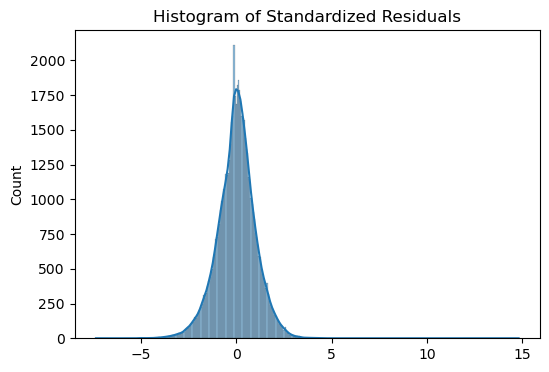

In [28]:
# Transforming data Using Box-Cox
df_combined['transformed_WegDammBonnBeuel'], _ = boxcox(df_combined['WegDammBonnBeuel'] + 1)  

model = SARIMAX(df_combined['transformed_WegDammBonnBeuel'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=exog)
results = model.fit()

residuals = results.resid
std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# standardized residuals
plt.figure(figsize=(10, 4))
plt.plot(std_residuals)
plt.title('Standardized Residuals')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(std_residuals, kde=True)
plt.title('Histogram of Standardized Residuals')
plt.show()

#### interpretation: 
--> no pattern but a spike here and there that should be addressed. 

### --> This could be a solution, lets try it for every location!

### Iterating over all locations: Doesnt work

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.pyplot as plt

location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']


results_dict = {}

for location_name in location_names:
    transformed_column, _ = boxcox(df_combined[location_name] + 1)
    results_dict[location_name] = transformed_column
    
results_dict

{'KennedyBrücke': array([ 7.79948055,  9.62011417, 10.26256875, ...,  9.13211951,
         9.24407674,  7.94140601]),
 'NordBrücke': array([1.2017933 , 3.49499121, 2.28532467, ..., 2.63618526, 1.83726619,
        0.73331511]),
 'SüdBrücke': array([4.13505901, 3.22380397, 4.13505901, ..., 2.66886947, 2.9149185 ,
        2.79679293]),
 'Estermannufer': array([0.        , 1.08554847, 0.        , ..., 1.08554847, 0.        ,
        1.08554847]),
 'VonSandtUfer': array([0.        , 3.03347817, 0.        , ..., 0.7185448 , 2.15509767,
        2.31946237]),
 'Rhenusallee': array([1.14984039, 2.75741271, 3.03375614, ..., 0.        , 0.        ,
        0.        ]),
 'BrühlerStraße': array([0.76516474, 0.76516474, 3.59354254, ..., 3.59354254, 1.28682663,
        1.6946545 ]),
 'WilhelmSpiritusUfer': array([0.        , 0.        , 0.        , ..., 3.88637911, 4.04474409,
        3.31558801]),
 'McCloyWeg': array([0.        , 0.        , 0.        , ..., 0.69898149, 0.69898149,
        1.992360

In [34]:
import seaborn as sns

import os
if not os.path.exists('residual_plots'):
    os.makedirs('residual_plots')

for location_name in location_names:
    model = sm.tsa.SARIMAX(results_dict[location_name], order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=exog)
    results = model.fit()
    
    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
    
    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {location_name}')
    plt.savefig(f'residual_plots/standardized_residuals_{location_name}.png')
    plt.close()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {location_name}')
    plt.savefig(f'residual_plots/histogram_residuals_{location_name}.png')
    plt.close()


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [ ]:
# Defining a function

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def process_location(location_name, df_combined, exog, output_folder):
    transformed_column, _ = boxcox(df_combined[location_name] + 1)
    
    model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=exog)
    results = model.fit()
    
    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
    
    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {location_name}')
    plt.savefig(f'{output_folder}/standardized_residuals_{location_name}.png')
    plt.close()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {location_name}')
    plt.savefig(f'{output_folder}/histogram_residuals_{location_name}.png')
    plt.close()

    def reverse_boxcox(y, lambda_):
        if lambda_ == 0:
            return np.exp(y)
        else:
            return np.exp(np.log(lambda_ * y + 1) / lambda_)

    
    predicted_transformed = results.predict(start=0, end=len(df_combined) - 1)
    predicted_actual = reverse_boxcox(predicted_transformed, results.model.endog[1])

    
    return predicted_actual

In [11]:
import os
exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']
location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']

output_folder = 'location_results'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
    
specific_location = 'KennedyBrücke'

predicted_actual = process_location(specific_location, df_combined, exog=df_combined[exog_variables], output_folder=output_folder)

results_dict = {specific_location: predicted_actual}



C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\bough\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


--> Doesn't work 

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


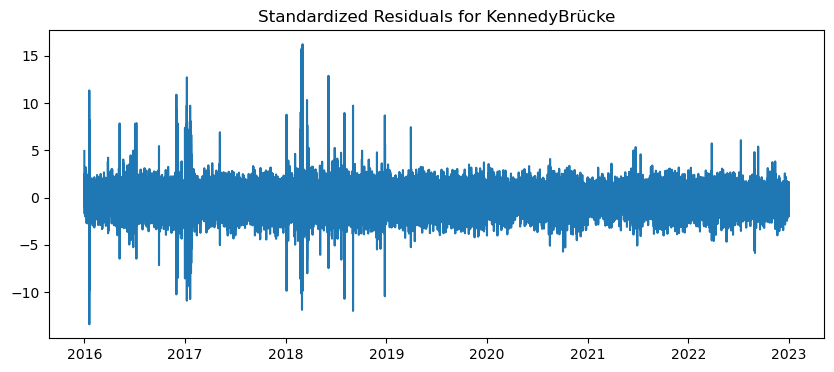

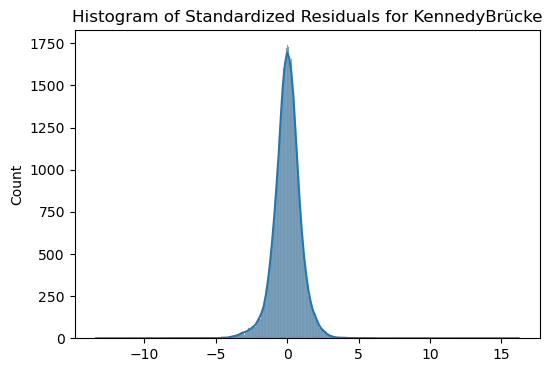

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


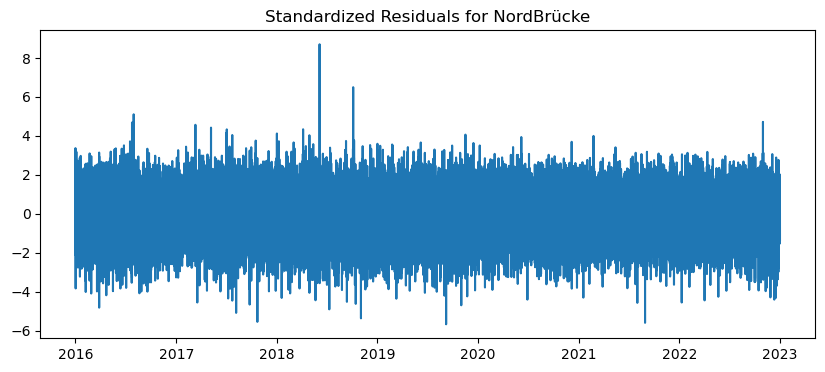

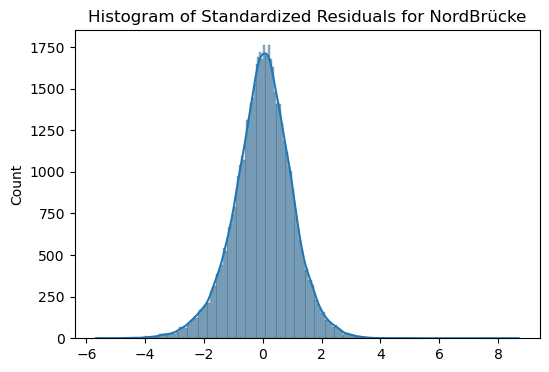

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


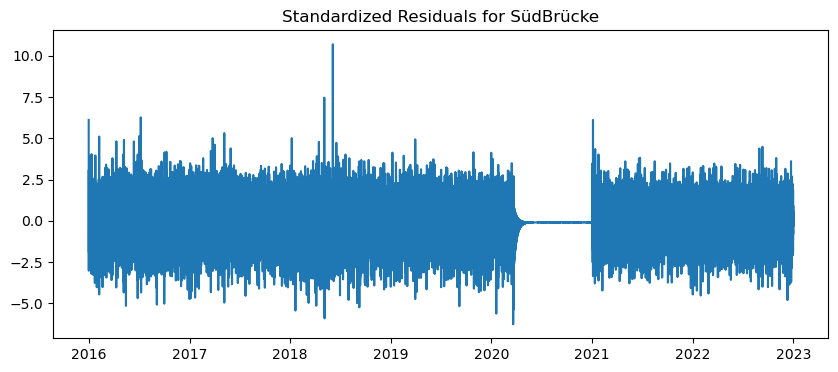

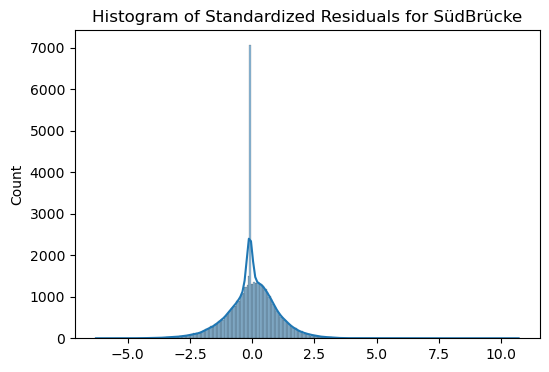

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


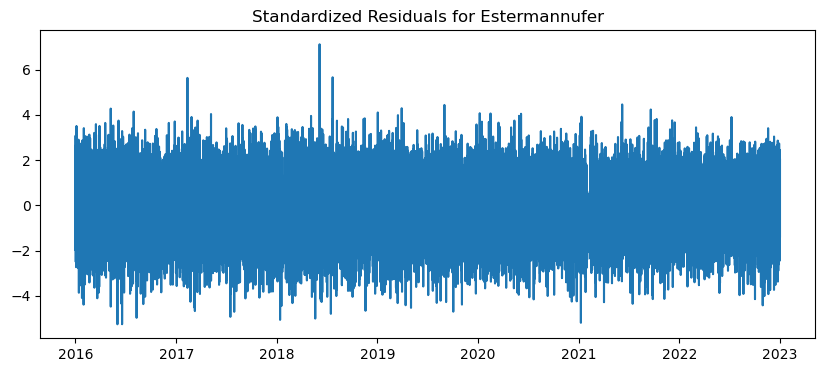

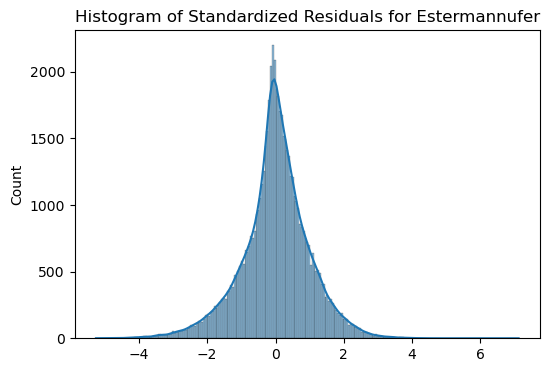

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


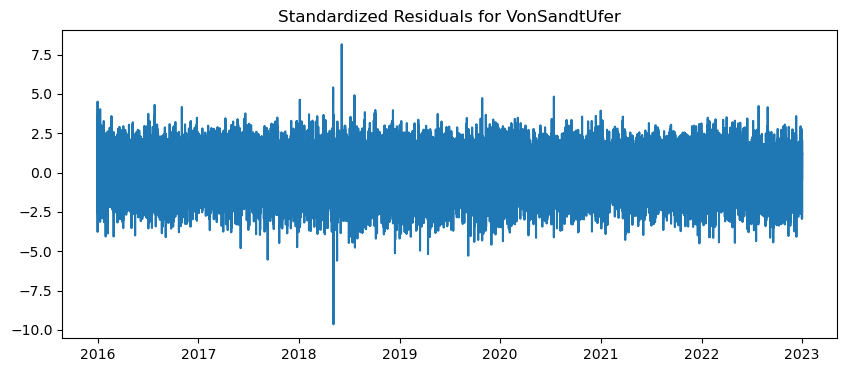

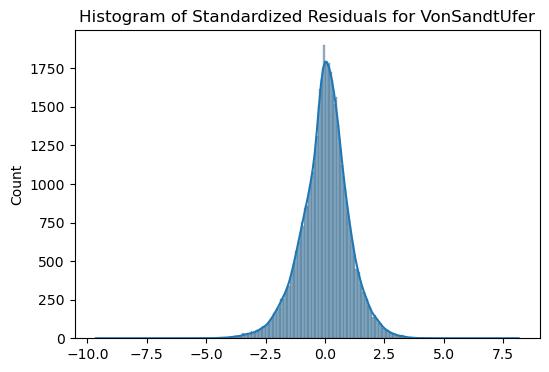

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


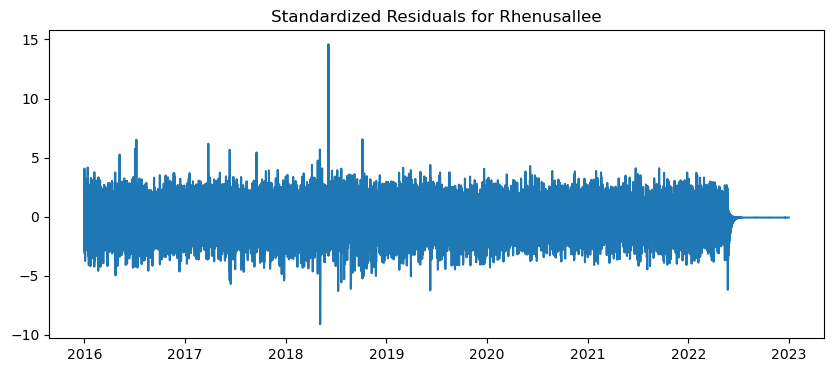

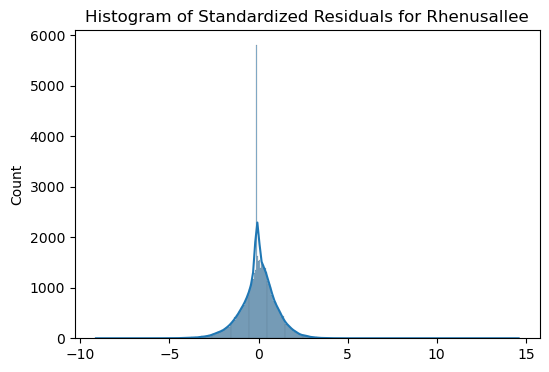

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


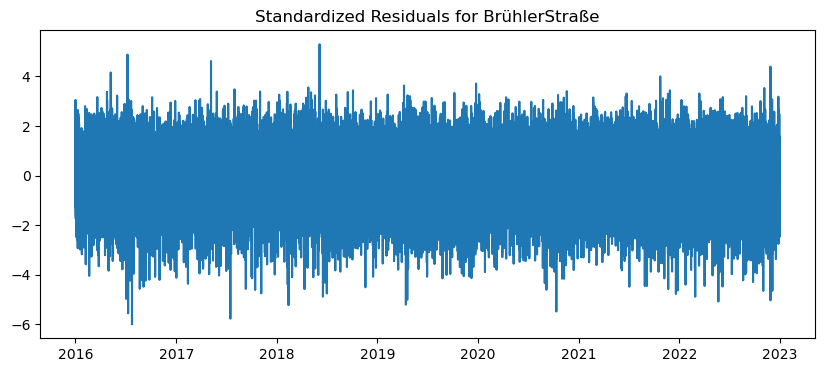

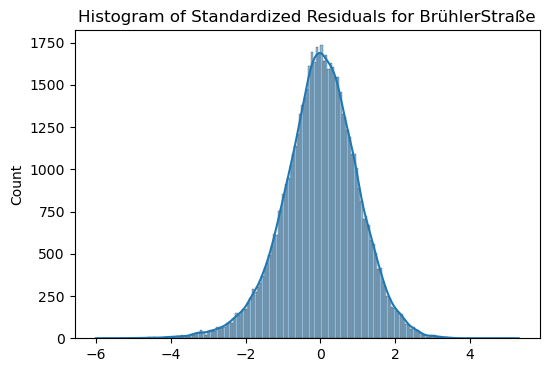

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MemoryError: Unable to allocate 317. MiB for an array with shape (26, 26, 61368) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 1000, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 317. MiB for an array with shape (26, 26, 61368) and data type float64


AttributeError: Memoryview is not initialized

In [15]:
location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']
exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']

results_dict = {}

for specific_location in location_names:
    transformed_column, _ = boxcox(df_combined[specific_location] + 1)

    model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=df_combined[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals
    }

## --> Run out of memory!!

### --> It doesnt work when i iterate. Solution? one by one

### Kennedybrücke

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


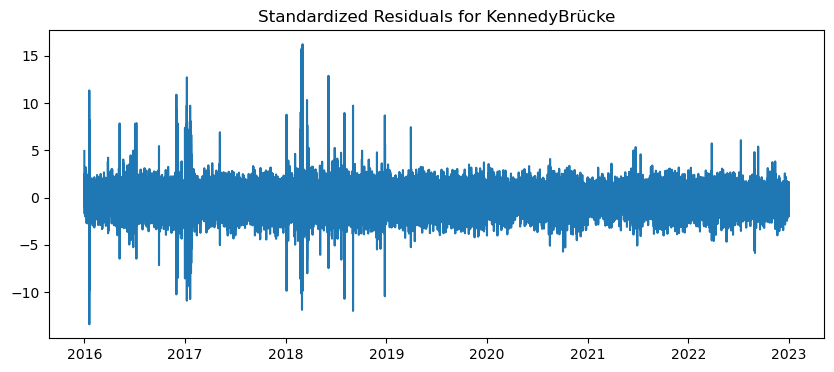

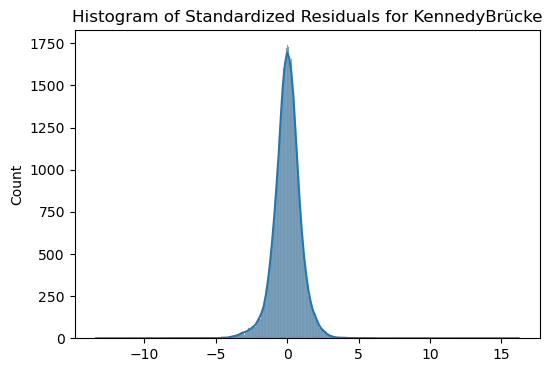

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']
exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']

results_dict = {}

specific_location = 'KennedyBrücke'

transformed_column, _ = boxcox(df_combined[specific_location] + 1)

model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=df_combined[exog_variables])
results = model.fit()

residuals = results.resid
std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

plt.figure(figsize=(10, 4))
plt.plot(std_residuals)
plt.title(f'Standardized Residuals for {specific_location}')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(std_residuals, kde=True)
plt.title(f'Histogram of Standardized Residuals for {specific_location}')
plt.show()

results_dict[specific_location] = {
    'transformed_data': transformed_column,
    'model_results': results,
    'standardized_residuals': std_residuals
}



### correct: Kennedybrücke

In [25]:
train_end = pd.to_datetime('2021-12-31 23:00:00')
test_start = pd.to_datetime('2022-01-01 00:00:00')

train_data = df_combined.loc[df_combined.index <= train_end]
test_data = df_combined.loc[df_combined.index >= test_start]

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']
exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']

results_dict = {}

locations_to_process = ['KennedyBrücke']

for specific_location in locations_to_process:
    transformed_column, lam = boxcox(train_data[specific_location] + 1) 

    model = sm.tsa.SARIMAX(transformed_column, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24), exog=train_data[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals,
        'lambda': lam  
    }


In [40]:
# 'KennedyBrücke'
specific_location = 'KennedyBrücke'
model_results = results_dict[specific_location]['model_results']
lam = results_dict[specific_location]['lambda']

forecasted_transformed_values = model_results.forecast(steps=len(test_data), exog=test_data[exog_variables])

In [41]:
def inverse_boxcox(y, lam):
    if lam == 0:
        return np.exp(y) - 1
    else:
        return np.power(lam * y + 1, 1 / lam) - 1

forecasted_original_values = inverse_boxcox(forecasted_transformed_values, lam)

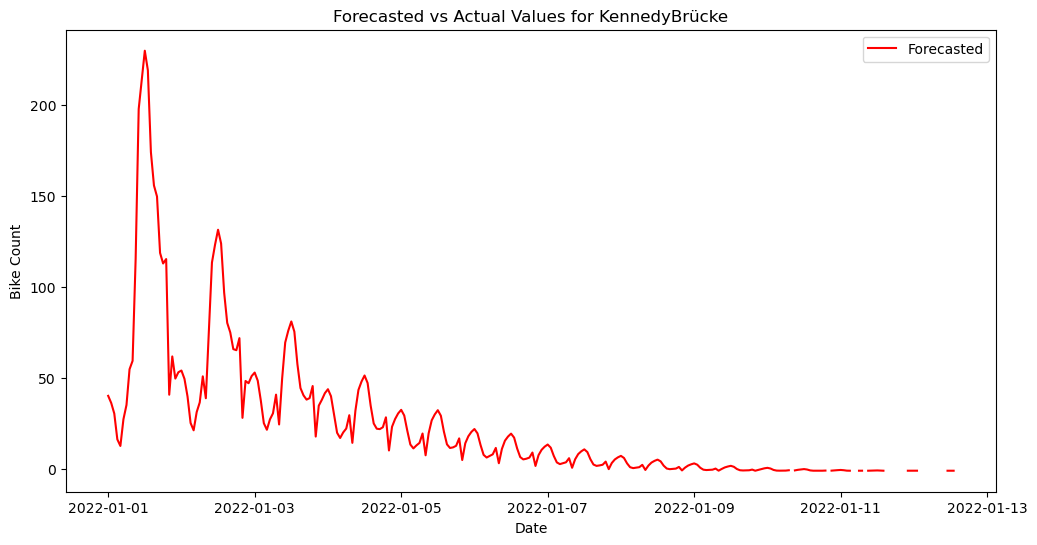

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, forecasted_original_values, label='Forecasted', color='red')

plt.title(f'Forecasted vs Actual Values for {specific_location}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.show()

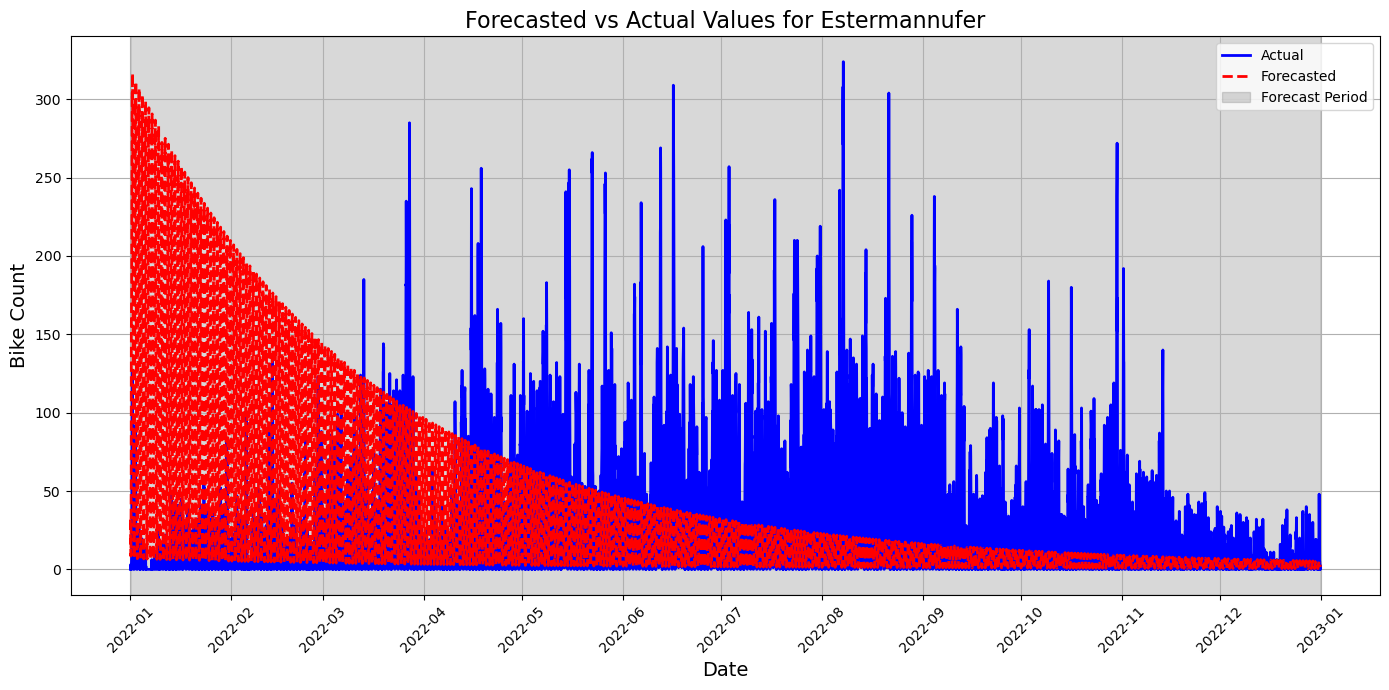

In [34]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(test_data.index, test_data[specific_location], label='Actual', color='blue', linewidth=2)

forecast_dates = test_data.index[:len(forecasted_original_values)]
ax.plot(forecast_dates, forecasted_original_values, label='Forecasted', color='red', linestyle='--', linewidth=2)

ax.fill_between(forecast_dates, 0, 1, where=(forecast_dates >= forecast_dates[0]) & (forecast_dates <= forecast_dates[-1]), 
                transform=ax.get_xaxis_transform(), color='grey', alpha=0.3, label='Forecast Period')

ax.set_title(f'Forecasted vs Actual Values for {specific_location}', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Bike Count', fontsize=14)
ax.legend()
ax.grid(True)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Correct: Estermannufer

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


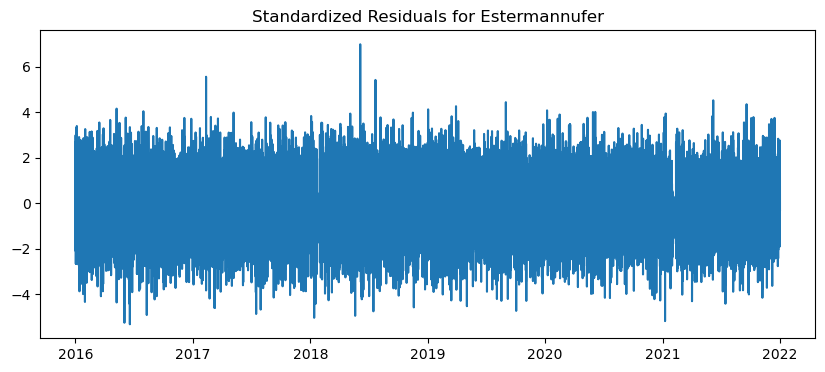

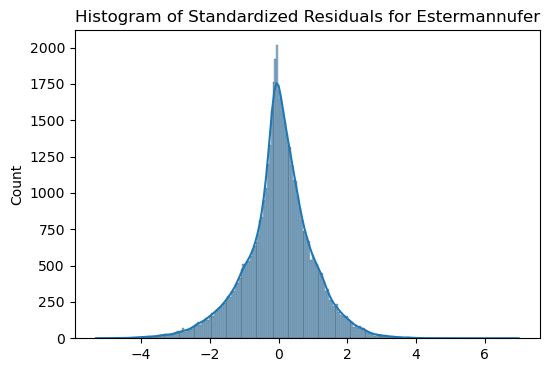

In [33]:
locations_to_process = ['Estermannufer']

for specific_location in locations_to_process:
    transformed_column, lam = boxcox(train_data[specific_location] + 1)

    model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=train_data[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals,
        'lambda': lam  
    }


In [35]:
specific_location = 'Estermannufer'
model_results = results_dict[specific_location]['model_results']
lam = results_dict[specific_location]['lambda']

forecasted_transformed_values = model_results.forecast(steps=len(test_data), exog=test_data[exog_variables])

In [36]:
forecasted_original_values = inverse_boxcox(forecasted_transformed_values, lam)

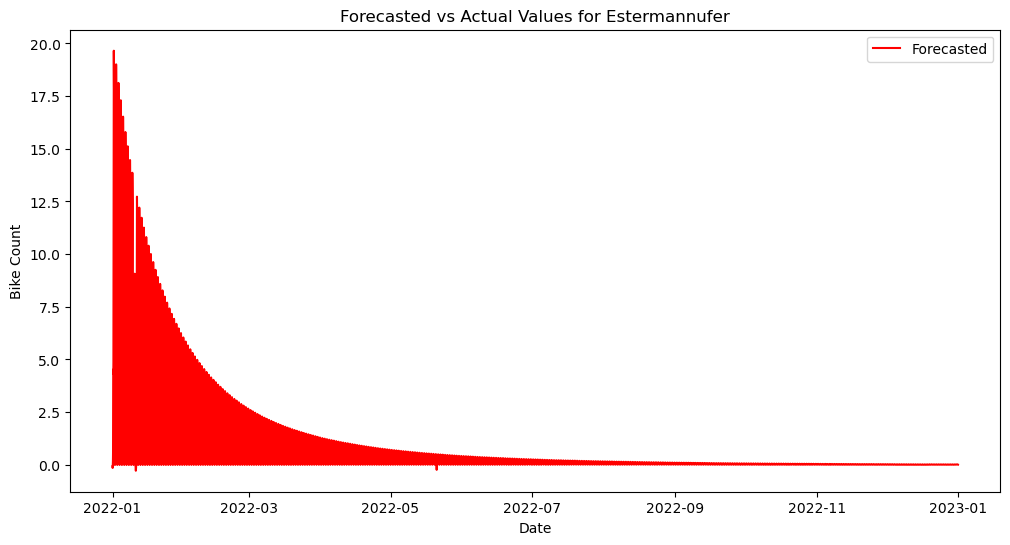

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, forecasted_original_values, label='Forecasted', color='red')
plt.title(f'Forecasted vs Actual Values for {specific_location}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.show()

### Correct:  Kennedybrücke + Nordbrücke

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


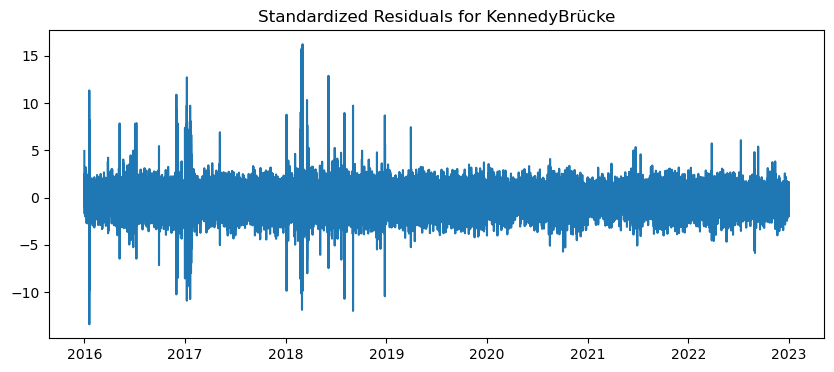

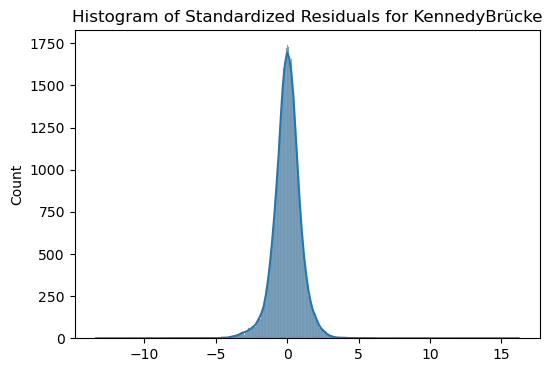

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


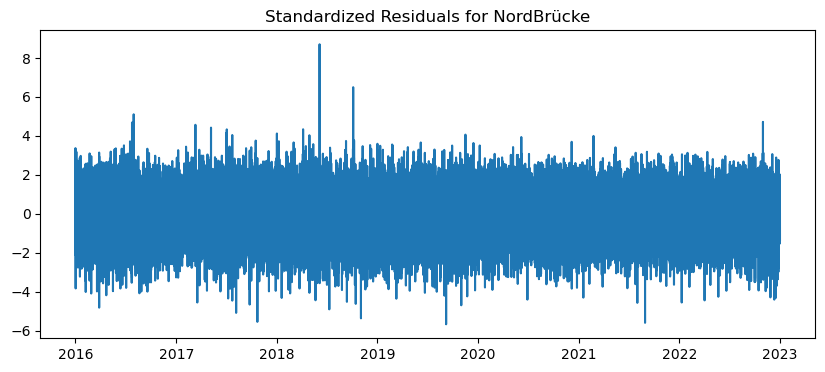

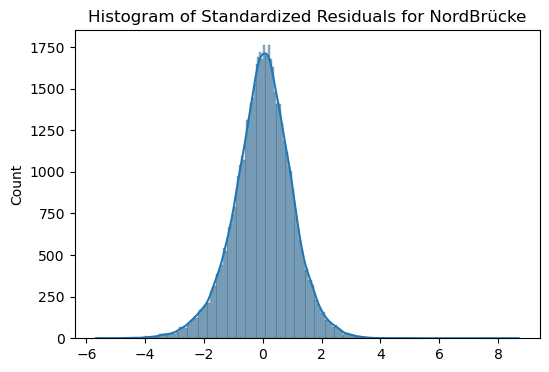

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

location_names = ['KennedyBrücke', 'NordBrücke', 'SüdBrücke', 'Estermannufer', 'VonSandtUfer', 
             'Rhenusallee', 'BrühlerStraße', 'WilhelmSpiritusUfer', 'McCloyWeg', 'WegDammBonnBeuel']
exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']

results_dict = {}

locations_to_process = ['KennedyBrücke', 'NordBrücke']

for specific_location in locations_to_process:
    transformed_column, _ = boxcox(df_combined[specific_location] + 1)

    model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=df_combined[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals
    }



{'KennedyBrücke': {'transformed_data': array([ 7.79948055,  9.62011417, 10.26256875, ...,  9.13211951,
          9.24407674,  7.94140601]),
  'model_results': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x2ba5b8ae7f0>,
  'standardized_residuals': Datetime
  2016-01-01 00:00:00    4.933560
  2016-01-01 01:00:00    1.752125
  2016-01-01 02:00:00    1.066463
  2016-01-01 03:00:00    1.255357
  2016-01-01 04:00:00   -0.926813
                           ...   
  2022-12-31 19:00:00    0.413460
  2022-12-31 20:00:00   -0.635498
  2022-12-31 21:00:00   -0.935528
  2022-12-31 22:00:00    0.738936
  2022-12-31 23:00:00   -0.062964
  Freq: H, Length: 61368, dtype: float64},
 'NordBrücke': {'transformed_data': array([1.2017933 , 3.49499121, 2.28532467, ..., 2.63618526, 1.83726619,
         0.73331511]),
  'model_results': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x2bb8d4481f0>,
  'standardized_residuals': Datetime
  2016-01-01 00:00:00    1.539365
  2016-01-01

### Correct: Estermannufer + VonSandtUfer + BrühlerStraße:

In [ ]:
locations_to_process = ['Estermannufer', 'VonSandtUfer', 'BrühlerStraße']

for specific_location in locations_to_process:
    transformed_column, _ = boxcox(df_combined[specific_location] + 1)

    model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=df_combined[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals
    }


## SüdBrücke + Estermannufer: 

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


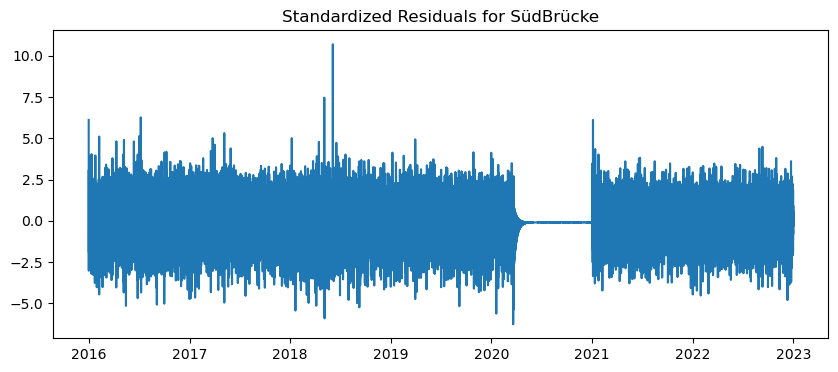

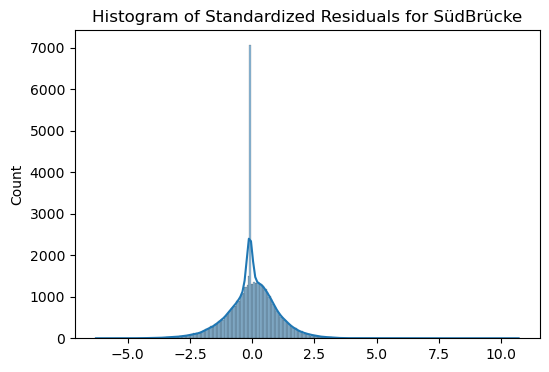

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


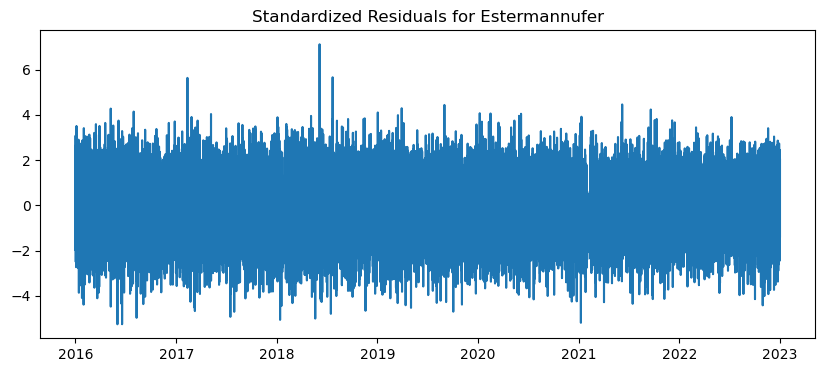

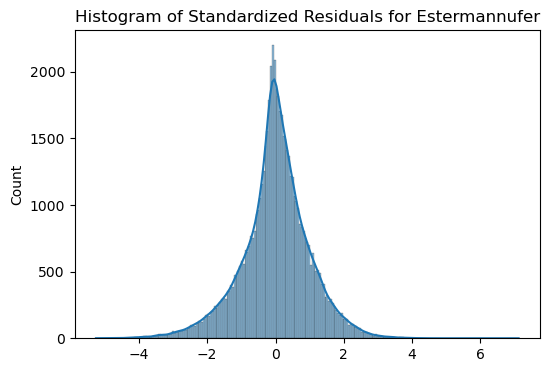

In [10]:
locations_to_process = ['SüdBrücke', 'Estermannufer']

for specific_location in locations_to_process:
    transformed_column, _ = boxcox(df_combined[specific_location] + 1)

    model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=df_combined[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals
    }


## VonSandtUfer, Rhenusallee:

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


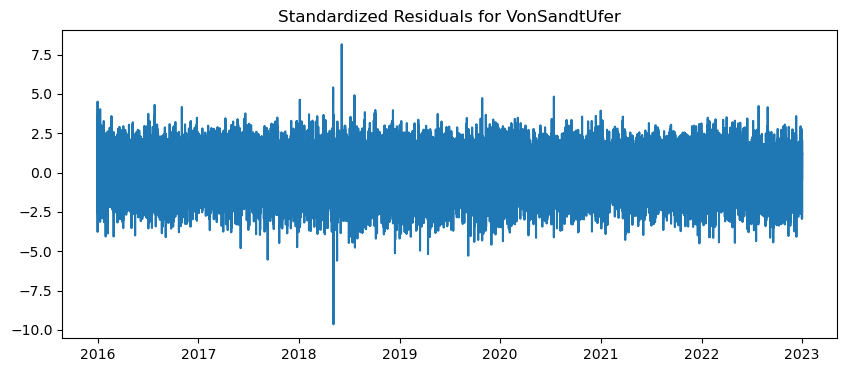

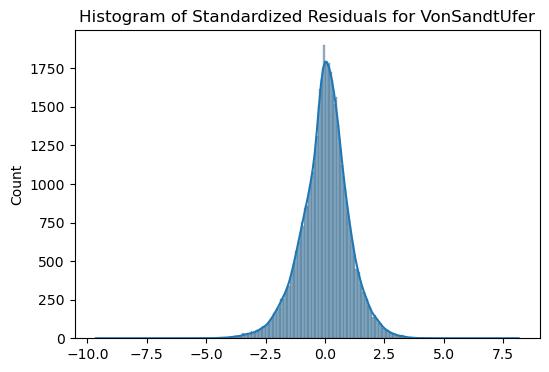

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


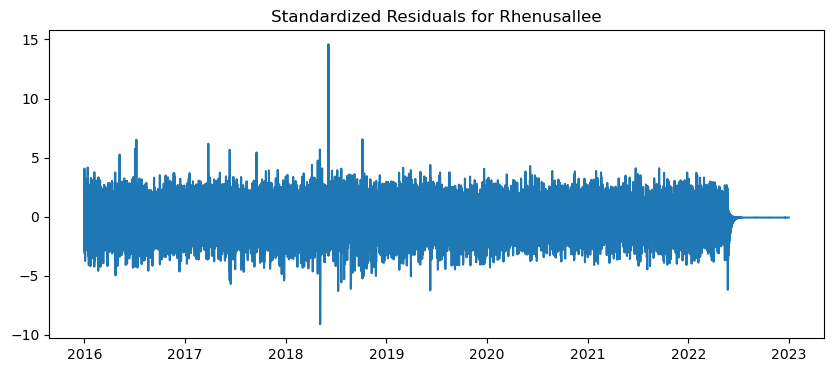

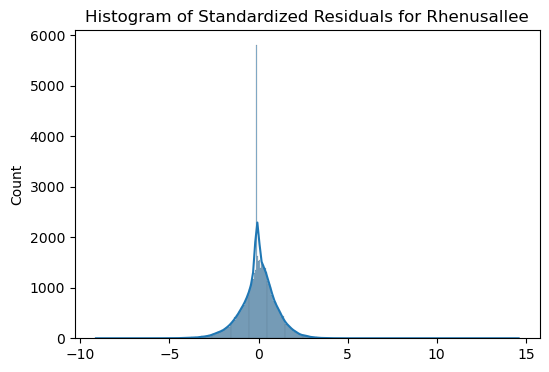

In [11]:
locations_to_process = ['VonSandtUfer', 'Rhenusallee']

for specific_location in locations_to_process:
    transformed_column, _ = boxcox(df_combined[specific_location] + 1)

    model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=df_combined[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals
    }


## BrühlerStraße + WilhelmSpiritusUfer:

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


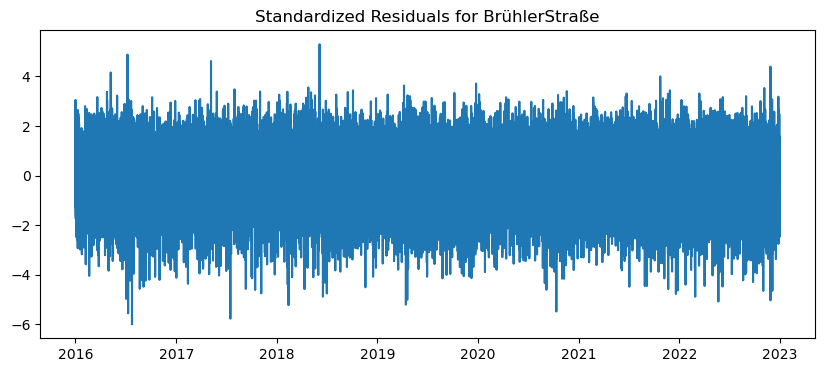

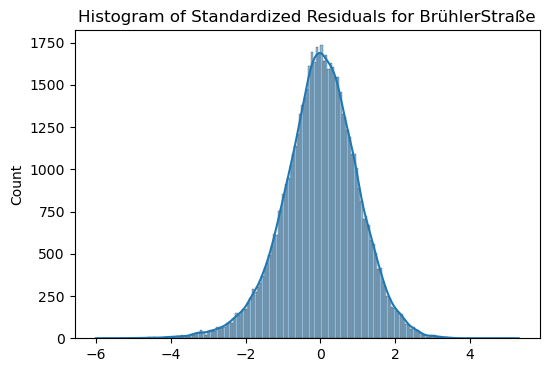

MemoryError: Unable to allocate 22.5 MiB for an array with shape (48, 61320) and data type float64

In [12]:
locations_to_process = ['BrühlerStraße', 'WilhelmSpiritusUfer']

for specific_location in locations_to_process:
    transformed_column, _ = boxcox(df_combined[specific_location] + 1)

    model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=df_combined[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals
    }

In [13]:
results_dict

{'KennedyBrücke': {'transformed_data': array([ 7.79948055,  9.62011417, 10.26256875, ...,  9.13211951,
          9.24407674,  7.94140601]),
  'model_results': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x295f7532f10>,
  'standardized_residuals': Datetime
  2016-01-01 00:00:00    4.933560
  2016-01-01 01:00:00    1.752125
  2016-01-01 02:00:00    1.066463
  2016-01-01 03:00:00    1.255357
  2016-01-01 04:00:00   -0.926813
                           ...   
  2022-12-31 19:00:00    0.413460
  2022-12-31 20:00:00   -0.635498
  2022-12-31 21:00:00   -0.935528
  2022-12-31 22:00:00    0.738936
  2022-12-31 23:00:00   -0.062964
  Freq: H, Length: 61368, dtype: float64},
 'NordBrücke': {'transformed_data': array([1.2017933 , 3.49499121, 2.28532467, ..., 2.63618526, 1.83726619,
         0.73331511]),
  'model_results': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x295e98f6610>,
  'standardized_residuals': Datetime
  2016-01-01 00:00:00    1.539365
  2016-01-01

## McCloyWeg + WegDammBonnBeuel

In [14]:
locations_to_process = ['McCloyWeg', 'WegDammBonnBeuel']

for specific_location in locations_to_process:
    transformed_column, _ = boxcox(df_combined[specific_location] + 1)

    model = sm.tsa.SARIMAX(transformed_column, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24), exog=df_combined[exog_variables])
    results = model.fit()

    residuals = results.resid
    std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    plt.figure(figsize=(10, 4))
    plt.plot(std_residuals)
    plt.title(f'Standardized Residuals for {specific_location}')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.histplot(std_residuals, kde=True)
    plt.title(f'Histogram of Standardized Residuals for {specific_location}')
    plt.show()

    results_dict[specific_location] = {
        'transformed_data': transformed_column,
        'model_results': results,
        'standardized_residuals': std_residuals
    }

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MemoryError: Unable to allocate 317. MiB for an array with shape (26, 26, 61369) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 982, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 317. MiB for an array with shape (26, 26, 61369) and data type float64


AttributeError: Memoryview is not initialized

## Since everytime i am running out of memory, i will change the frequncy to days:

In [4]:
import pandas as pd


daily_df = df_combined.resample('D').agg({
    'Temperature (°C)': 'mean',
    'Precipitations (mm)': 'mean',
    'Wind Speed (m/s)': 'mean',
    'KennedyBrücke': 'sum',
    'NordBrücke': 'sum',
    'SüdBrücke': 'sum',
    'Estermannufer': 'sum',
    'VonSandtUfer': 'sum',
    'Rhenusallee': 'sum',
    'BrühlerStraße': 'sum',
    'WilhelmSpiritusUfer': 'sum',
    'McCloyWeg': 'sum',
    'WegDammBonnBeuel': 'sum'
})
daily_df

Temperature (°C)  Precipitations (mm)  Wind Speed (m/s)  \
Datetime                                                              
2016-01-01          5.508333             0.020833          3.700000   
2016-01-02          3.837500             0.008333          5.225000   
2016-01-03          5.766667             0.000000          4.404167   
2016-01-04          4.995833             0.029167          4.037500   
2016-01-05          6.208333             0.083333          3.758333   
...                      ...                  ...               ...   
2022-12-27          4.783333             0.000000          4.958333   
2022-12-28          8.858333             0.000000          5.879167   
2022-12-29          9.870833             0.012500          5.762500   
2022-12-30          8.508333             0.016667          5.862500   
2022-12-31         15.795833             0.000000          6.800000   

            KennedyBrücke  NordBrücke  SüdBrücke  Estermannufer  VonSandtUfer  \
Datetime                                                                        
2016-01-01         1817.0       487.0      795.0          190.0         536.0   
2016-01-02         1587.0       133.0      241.0           31.0         167.0   
2016-01-03         1858.0       384.0      697.0          164.0         556.0   
2016-01-04         4020.0       349.0     1243.0          107.0         478.0   
2016-01-05         5221.0       524.0     1656.0          198.0         710.0   
...                   ...         ...        ...            ...           ...   
2022-12-27         4270.0       764.0      543.0          269.0         710.0   
2022-12-28         3927.0       534.0      418.0          226.0         552.0   
2022-12-29         4281.0       613.0      527.0          220.0         567.0   
2022-12-30         3654.0       429.0      346.0          129.0         410.0   
2022-12-31         3031.0       543.0      494.0          224.0         680.0   

            Rhenusallee  BrühlerStraße  WilhelmSpiritusUfer  McCloyWeg  \
Datetime                                                                 
2016-01-01        767.0          216.0                  0.0        0.0   
2016-01-02        184.0          199.0                  0.0        0.0   
2016-01-03        679.0          214.0                  0.0        0.0   
2016-01-04        650.0          474.0                  0.0        0.0   
2016-01-05        871.0          654.0                  0.0        0.0   
...                 ...            ...                  ...        ...   
2022-12-27          0.0          556.0               1096.0      563.0   
2022-12-28          0.0          484.0                916.0      401.0   
2022-12-29          0.0          478.0                993.0      435.0   
2022-12-30          0.0          477.0                683.0      299.0   
2022-12-31          0.0          374.0                833.0      618.0   

            WegDammBonnBeuel  
Datetime                      
2016-01-01               0.0  
2016-01-02               0.0  
2016-01-03               0.0  
2016-01-04               0.0  
2016-01-05               0.0  
...                      ...  
2022-12-27            1078.0  
2022-12-28             757.0  
2022-12-29             894.0  
2022-12-30             644.0  
2022-12-31            1022.0  

[2557 rows x 13 columns]

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
daily_df.to_csv('daily_df.csv', index=True)


#### Preparing data:

In [14]:


exog_variables = ['Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']

cutoff_date = pd.Timestamp('2022-01-01')
train_df = daily_df[daily_df.index < cutoff_date]
test_df = daily_df[daily_df.index >= cutoff_date]
 

### Grid search:

In [ ]:
import itertools
import warnings

p = d = q = range(0, 3) 
seasonal_pdq = [(x[0], 1, x[1], 12) for x in list(itertools.product(p, q))]  

for location in location_columns:
    print(f"Modeling for: {location}")

    
    train_y = train_df[location]
    test_y = test_df[location]

    lowest_aic = float(" ")
    best_pdq = None
    best_seasonal_pdq = None

    warnings.filterwarnings("ignore")

    # Grid Search
    for combination in itertools.product(p, d, q):
        for seasonal_combination in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(train_y,
                                                  exog=train_X,
                                                  order=combination,
                                                  seasonal_order=seasonal_combination,
                                                  enforce_stationarity=False,
                                                  enforce_invertibility=False)
                results = model.fit()
                if results.aic < lowest_aic:
                    lowest_aic = results.aic
                    best_pdq = combination
                    best_seasonal_pdq = seasonal_combination
            except:
                continue

    print(f"Best SARIMAX{best_pdq}x{best_seasonal_pdq} for {location} - AIC:{lowest_aic}")


Modeling for: KennedyBrücke


#### --> Never been executed!!

### Tuning: 

#### Grid search: 

In [75]:
import itertools


def sarimax_grid_search(y, exog, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            model = SARIMAX(y, exog=exog, order=order)
            model_fit = model.fit(disp=0)
            error = mean_squared_error(y, model_fit.fittedvalues)
            if error < best_score:
                best_score, best_cfg = error, order
            print('SARIMAX%s MSE=%.3f' % (order, error))
        except:
            continue
    print('Best SARIMAX%s MSE=%.3f' % (best_cfg, best_score))

p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]


sarimax_grid_search(df2022['KennedyBrücke'], df2022[exog_variables], p_values, d_values, q_values)

C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 0) MSE=52885.578


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 0, 1) MSE=19122.869


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 0, 2) MSE=11625.329


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 0) MSE=11092.775


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1) MSE=8966.827


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 2) MSE=8964.902


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0) MSE=10571.011


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 1) MSE=8221.544


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 2) MSE=8138.269


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0) MSE=9574.982


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1) MSE=8965.561


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 2) MSE=8056.711


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(2, 0, 0) MSE=8473.965


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(2, 0, 1) MSE=8142.345


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2) MSE=8131.129


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 0) MSE=8819.929


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 1) MSE=8819.936


C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\bough\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 2) MSE=7916.979
Best SARIMAX(2, 1, 2) MSE=7916.979
